In [4]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import cv2
import pathlib
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tqdm import tqdm

In [5]:
def increase_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=50., tileGridSize=(8,8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))  # merge channels
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    return img 

def Preprocessing(image):
    matrix=[]
    image=cv2.imread(r"%s"%image)
    image=increase_contrast(cv2.cvtColor(image, cv2.COLOR_BGR2HLS))
    for k in range(len(image)-1):
        matrix.append(np.round(np.array([image[k][k],image[k][k+1],image[k+1][k],image[k+1][k+1]]).mean()))
    return list(matrix)

In [6]:
model=Sequential()
model.add(Dense(2048, input_shape=(127,), activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(500, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
y

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [6]:
early_stopping=EarlyStopping(monitor='val_accuracy', patience=25)
modelcheckpoint=ModelCheckpoint('out/other_identification_model.hdf5', monitor='val_accuracy', save_best_only=True)

X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
h=model.fit(X, y, epochs=50, validation_data=(X_test, y_test),callbacks=[early_stopping], verbose=1)
print("Done")

Epoch 1/50
188/188 [==============================] - 5s 28ms/step - loss: 1.0936 - accuracy: 0.9165 - val_loss: 1.6790 - val_accuracy: 0.8400
Epoch 2/50
188/188 [==============================] - 5s 26ms/step - loss: 0.4765 - accuracy: 0.9518 - val_loss: 1.3054 - val_accuracy: 0.8950
Epoch 3/50
188/188 [==============================] - 5s 25ms/step - loss: 0.3701 - accuracy: 0.9583 - val_loss: 0.3502 - val_accuracy: 0.9450
Epoch 4/50
188/188 [==============================] - 5s 26ms/step - loss: 0.2253 - accuracy: 0.9727 - val_loss: 0.4163 - val_accuracy: 0.9583
Epoch 5/50
188/188 [==============================] - 5s 25ms/step - loss: 0.2264 - accuracy: 0.9700 - val_loss: 0.6659 - val_accuracy: 0.9350
Epoch 6/50
188/188 [==============================] - 5s 25ms/step - loss: 0.3563 - accuracy: 0.9592 - val_loss: 0.4315 - val_accuracy: 0.9567
Epoch 7/50
188/188 [==============================] - 5s 25ms/step - loss: 0.4581 - accuracy: 0.9570 - val_loss: 0.6025 - val_accuracy: 0.9333

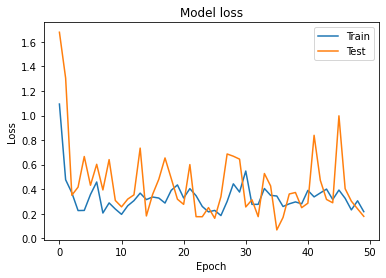

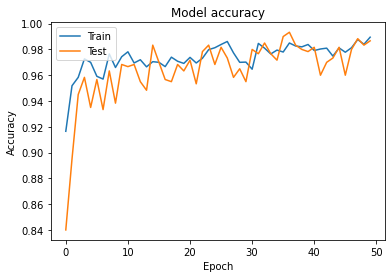

model accuracy :  0.9867


In [9]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(h.history['loss'], h.history['val_loss'])
plot_accuracy(h.history['accuracy'], h.history['val_accuracy'])
print('model accuracy : ', np.round(model.evaluate(X_test, y_test, verbose=0)[1],4))

In [10]:
compt=0
for k in range(150):
    #print(list(np.round(model.predict(X_test,verbose=0)[k])).index(1),list(y_test[k]).index(1))
    if list(np.round(model.predict(X_test,verbose=0)[k])).index(1)==list(y_test[k]).index(1):
        compt+=1
compt

150

In [36]:
test=[]
path=r"C:\Users\33649\Documents\ROI Database\NIR\0398\1_05_s.jpg"
test.append(Preprocessing(path))
list(np.round(model.predict(np.array(test),verbose=0)[0])).index(1)+1

398

In [56]:
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

best_model=load_model('out/best_identification_model.hdf5')

test=[]
path=r"C:\Users\33649\Documents\ROI Database\NIR\0456\1_04_s.jpg"
test.append(Preprocessing(path))

print("C'est la personne n°", list(np.round(best_model.predict(np.array(test),verbose=0)[0])).index(1)+1)

C'est la personne n° 456


In [44]:
best_model.get_weights()

[array([[-0.05766393, -0.04531816,  0.02599324, ...,  0.04196864,
          0.0297791 ,  0.0430354 ],
        [ 0.02467466, -0.05179829, -0.04570478, ..., -0.05122634,
          0.00831091, -0.05715386],
        [-0.04119336, -0.03594619, -0.03645917, ...,  0.01527781,
          0.00245045, -0.06075114],
        ...,
        [ 0.00230971, -0.03978612, -0.02032222, ..., -0.022902  ,
         -0.01406258,  0.02607853],
        [-0.02535135, -0.05018272, -0.03687511, ..., -0.01339457,
          0.02040239,  0.02730736],
        [ 0.04275306,  0.00641011, -0.017583  , ...,  0.00598528,
          0.02459106,  0.02439081]], dtype=float32),
 array([-0.01861615, -0.00634781, -0.0099159 , ..., -0.00678863,
        -0.00551355, -0.01251882], dtype=float32),
 array([[ 0.03668213, -0.01268134, -0.03087249, ...,  0.02799465,
          0.02286915, -0.05970907],
        [-0.03552924,  0.04239038, -0.03215486, ...,  0.01787243,
          0.0192215 ,  0.01018303],
        [-0.03319678, -0.01486467, -0.

In [7]:
X_test


array([[ 89.,  74.,  28., ...,  29.,  80.,  85.],
       [ 67.,  36., 104., ..., 148., 165., 102.],
       [ 13.,  15.,  25., ..., 102., 100.,  45.],
       ...,
       [ 10.,  12.,  16., ...,  99., 102., 138.],
       [ 14.,  14.,  18., ...,  42.,  56.,  44.],
       [ 38.,  83.,  41., ..., 152.,  52.,  52.]])